In [56]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Linear Regresstion

In [2]:
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

In [3]:
DATA_FILE = 'data/birth_life_2010.txt'
data, n_samples = read_birth_life_data(DATA_FILE)
n_samples, data[:5]

(190, array([[ 1.822   , 74.82825 ],
        [ 3.869   , 70.81949 ],
        [ 3.911   , 72.15066 ],
        [ 5.578   , 61.999855],
        [ 1.579   , 73.92766 ]], dtype=float32))

In [ ]:
x = tf.placeholder(tf.float32, shape=None, name="x")
y = tf.placeholder(tf.float32, shape=None, name="y")
w = tf.get_variable(name="w", initializer=1.)
b = tf.get_variable(name="b",initializer=1.)
y_pred = w * x + b

## MSE loss

In [5]:
loss = tf.square(y - y_pred, name="loss")
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
optimizer = opt.minimize(loss)

In [6]:
start = time.time()
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        total_loss = 0
        for x_, y_ in data:
            _, loss_ = sess.run([optimizer, loss], feed_dict = {x: x_, y: y_})
            total_loss += loss_
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
   
    writer.close()
    w_out, b_out = w.eval(), b.eval()

print('Took: %f seconds' %(time.time() - start))

Epoch 0: 1568.9692803520122
Epoch 1: 942.3385196983814
Epoch 2: 832.811796224431
Epoch 3: 740.2402580444553
Epoch 4: 658.3754464801989
Epoch 5: 585.9248550408765
Epoch 6: 521.8070225622995
Epoch 7: 465.0646173995576
Epoch 8: 414.8506003169637
Epoch 9: 370.4145057224325
Epoch 10: 331.0936166469253
Epoch 11: 296.2993743072485
Epoch 12: 265.5116946970434
Epoch 13: 238.2702335912146
Epoch 14: 214.16700077005908
Epoch 15: 192.84110705986845
Epoch 16: 173.97367574083648
Epoch 17: 157.2819040422769
Epoch 18: 142.5156432926851
Epoch 19: 129.45341144360995
Epoch 20: 117.8989040715914
Epoch 21: 107.67870211957243
Epoch 22: 98.63963077073231
Epoch 23: 90.64455458763007
Epoch 24: 83.57465429066337
Epoch 25: 77.32281445565413
Epoch 26: 71.79440666188142
Epoch 27: 66.90659510796694
Epoch 28: 62.58535183131523
Epoch 29: 58.76519675430303
Epoch 30: 55.38838906633349
Epoch 31: 52.404082686117675
Epoch 32: 49.766598797239375
Epoch 33: 47.4358592791299
Epoch 34: 45.37666187658416
Epoch 35: 43.55743715868

In [7]:
w_out, b_out

(-6.0705147, 84.930885)

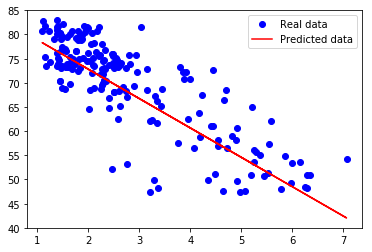

In [8]:
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()

## Huber loss

In [9]:
def huber_loss(labels, predictions, delta=14.0):
    residual = tf.abs(labels - predictions)
    def f1(): return 0.5 *  tf.square(residual)
    def f2(): return delta*residual - 0.5 * tf.square(delta)
    return tf.cond(residual <= delta, f1, f2)

In [10]:
loss = huber_loss(y, y_pred)
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
optimizer = opt.minimize(loss)

In [36]:
start = time.time()
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        total_loss = 0
        for x_, y_ in data:
            _, loss_ = sess.run([optimizer, loss], feed_dict = {x: x_, y: y_})
            total_loss += loss_
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
   
    writer.close()
    w_out, b_out = w.eval(), b.eval()

print('Took: %f seconds' %(time.time() - start))

Epoch 0: 1568.9692803520122
Epoch 1: 942.3385196983814
Epoch 2: 832.811796224431
Epoch 3: 740.2402580444553
Epoch 4: 658.3754464801989
Epoch 5: 585.9248550408765
Epoch 6: 521.8070225622995
Epoch 7: 465.0646173995576
Epoch 8: 414.8506003169637
Epoch 9: 370.4145057224325
Epoch 10: 331.0936166469253
Epoch 11: 296.2993743072485
Epoch 12: 265.5116946970434
Epoch 13: 238.2702335912146
Epoch 14: 214.16700077005908
Epoch 15: 192.84110705986845
Epoch 16: 173.97367574083648
Epoch 17: 157.2819040422769
Epoch 18: 142.5156432926851
Epoch 19: 129.45341144360995
Epoch 20: 117.8989040715914
Epoch 21: 107.67870211957243
Epoch 22: 98.63963077073231
Epoch 23: 90.64455458763007
Epoch 24: 83.57465429066337
Epoch 25: 77.32281445565413
Epoch 26: 71.79440666188142
Epoch 27: 66.90659510796694
Epoch 28: 62.58535183131523
Epoch 29: 58.76519675430303
Epoch 30: 55.38838906633349
Epoch 31: 52.404082686117675
Epoch 32: 49.766598797239375
Epoch 33: 47.4358592791299
Epoch 34: 45.37666187658416
Epoch 35: 43.55743715868

In [12]:
w_out, b_out

(-4.2700043, 78.66997)

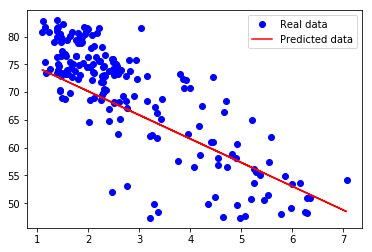

In [13]:
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()

# tf.data

In [16]:
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))
print(dataset.output_types)
print(dataset.output_shapes)

(tf.float32, tf.float32)
(TensorShape([]), TensorShape([]))


In [18]:
# tf.data.TextLineDataset(filenames)
# tf.data.FixedLengthRecordDataset(filenames)
# tf.data.TFRecordDataset(filenames)

In [19]:
# iterator = dataset.make_one_shot_iterator()
# iterator = dataset.make_initializable_iterator()

In [20]:
iterator = dataset.make_one_shot_iterator()
X, Y = iterator.get_next()  # X is the birth rate, Y is the life expectancy
with tf.Session() as sess:
    print(sess.run([X, Y])) # >> [1.822, 74.82825]
    print(sess.run([X, Y])) # >> [3.869, 70.81949]
    print(sess.run([X, Y])) # >> [3.911, 72.15066]


[1.822, 74.82825]
[3.869, 70.81949]
[3.911, 72.15066]


In [51]:
tf.reset_default_graph()
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))
iterator = dataset.make_initializable_iterator()
x, y = iterator.get_next()
w = tf.get_variable(name="w", initializer=1.)
b = tf.get_variable(name="b",initializer=1.)
y_pred = w * x + b
loss = tf.square(y - y_pred, name="loss")
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
optimizer = opt.minimize(loss)

In [53]:
start = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100): 
        sess.run(iterator.initializer) 
        total_loss = 0
        try:
            while True:
                _, loss_ = sess.run([optimizer, loss])
                total_loss += loss_
        except tf.errors.OutOfRangeError:
            pass
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
    w_out, b_out = w.eval(), b.eval()
print('Took: %f seconds' %(time.time() - start))
w_out, b_out

Epoch 0: 1568.9692803520122
Epoch 1: 942.3385196983814
Epoch 2: 832.811796224431
Epoch 3: 740.2402580444553
Epoch 4: 658.3754464801989
Epoch 5: 585.9248550408765
Epoch 6: 521.8070225622995
Epoch 7: 465.0646173995576
Epoch 8: 414.8506003169637
Epoch 9: 370.4145057224325
Epoch 10: 331.0936166469253
Epoch 11: 296.2993743072485
Epoch 12: 265.5116946970434
Epoch 13: 238.2702335912146
Epoch 14: 214.16700077005908
Epoch 15: 192.84110705986845
Epoch 16: 173.97367574083648
Epoch 17: 157.2819040422769
Epoch 18: 142.5156432926851
Epoch 19: 129.45341144360995
Epoch 20: 117.8989040715914
Epoch 21: 107.67870211957243
Epoch 22: 98.63963077073231
Epoch 23: 90.64455458763007
Epoch 24: 83.57465429066337
Epoch 25: 77.32281445565413
Epoch 26: 71.79440666188142
Epoch 27: 66.90659510796694
Epoch 28: 62.58535183131523
Epoch 29: 58.76519675430303
Epoch 30: 55.38838906633349
Epoch 31: 52.404082686117675
Epoch 32: 49.766598797239375
Epoch 33: 47.4358592791299
Epoch 34: 45.37666187658416
Epoch 35: 43.55743715868

(-6.0705147, 84.930885)

In [ ]:
# dataset = dataset.shuffle(1000)
# dataset = dataset.repeat(100)
# dataset = dataset.batch(128)
# dataset = dataset.map(lambda x: tf.one_hot(x, 10)) 

# Optimizer

In [ ]:
# tf.train.GradientDescentOptimizer
# tf.train.AdagradOptimizer
# tf.train.MomentumOptimizer
# tf.train.AdamOptimizer
# tf.train.FtrlOptimizer
# tf.train.RMSPropOptimizer

In [54]:
tf.Variable(2, trainable=True)  #trainable variable

<tf.Variable 'Variable:0' shape=() dtype=int32_ref>

# MNIST Logistic Regression

In [78]:
from tensorflow.examples.tutorials.mnist import input_data
# MNIST = input_data.read_data_sets('data/mnist', one_hot=True)
mnist = tf.keras.datasets.mnist
train, test = mnist.load_data()

In [83]:
print(train[0][0].shape)

(28, 28)


In [81]:
batch_size=10
train_data = tf.data.Dataset.from_tensor_slices(train)
train_data = train_data.shuffle(10000) # optional
train_data = train_data.batch(batch_size)
test_data = tf.data.Dataset.from_tensor_slices(test)
test_data = test_data.batch(batch_size)

In [82]:
iterator = tf.data.Iterator.from_structure(train_data.output_types, 
                                  train_data.output_shapes)
img, label = iterator.get_next()
train_init = iterator.make_initializer(train_data)
test_init = iterator.make_initializer(test_data)

In [ ]:
entropy = tf.nn.softmax_cross_entropy_with_logits(labels=label, logits=logits)
loss = tf.reduce_mean(entropy)
tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)